#                                       CASE STUDY REGRESSION

Background: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

Objective: 
1. The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. 
2. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

Data: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

In [1]:
# Meaning of the columns:
    
# Id: Unique identification number for the property.
# date: date the house was sold.
# price: price of the house. (Looks like the dependant variable)
# waterfront: house which has a view to a waterfront. (Possible independant)
# condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent. (possible indep)
# grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent. (possible indep)
# Sqft_above: square footage of house apart from basement.
# Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
# Sqft_lot15: lotSize area in 2015(implies - some renovations).

Get the tools:

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Import the csv file:

In [3]:
data = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\Week 5\data_mid_bootcamp_project_regression\Raw information\regression_data_clean.csv')

# EXPLORING THE DATA

We see the shape of our data, in order to check a correct importation and verify with how many data are we dealing  

In [4]:
data.shape

(21597, 21)

Have a preview of the heads:

In [5]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Check the column types, it's probably that they will need a modification in order to preprocess it correctly. As we see below,
some of the columns need to adapt to it's type

In [6]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

Check columns: There are updated columns for: sqft_living and sqft_lot -- 15, we'll decide which columns we are taking

In [7]:
data.columns


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

Let's check if the data has null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

# PREVISUALIZATION OF THE DATA BEFORE PROCESSING IT

We plot the variables that for a first instance look important to us. We plot multiple distplots graphs, and observe information like how are they distributed 

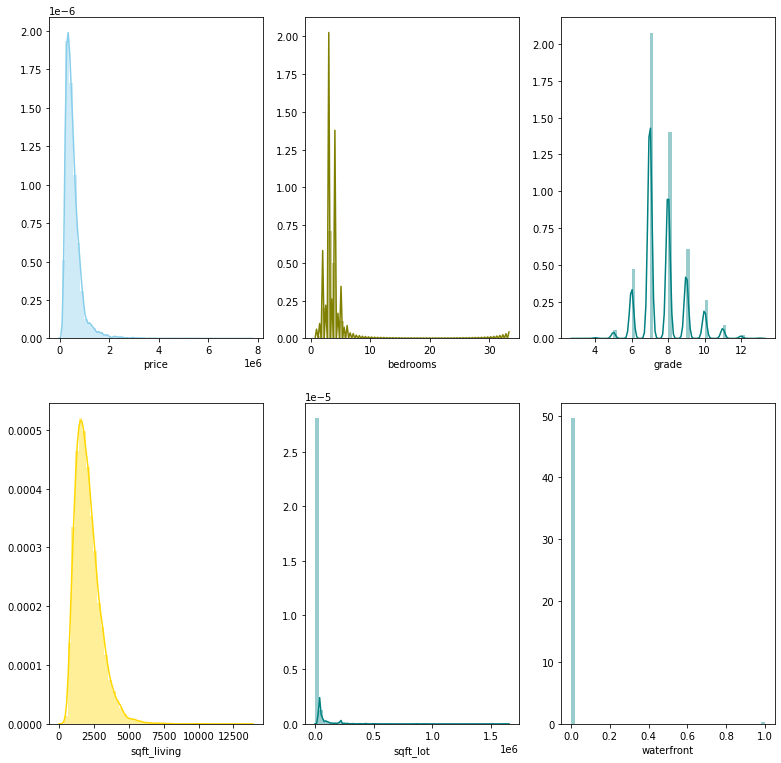

In [9]:
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=False)
sns.distplot( data["price"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["bedrooms"] , color="olive", ax=axes[0, 1])
sns.distplot( data["sqft_living"] , color="gold", ax=axes[1, 0])
sns.distplot( data["sqft_lot"] , color="teal", ax=axes[1, 1])
sns.distplot( data["grade"] , color="teal", ax=axes[0, 2])
sns.distplot( data["waterfront"] , color="teal", ax=axes[1, 2])

# Visualize the main numerical variables (For the moment), and see how are they distributed

As we have seen non - normal distribution for all of the variables plotted, let's see how all they are ditributed, this way we have a first overview

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018179F1EEE0>,
      dtype=object)

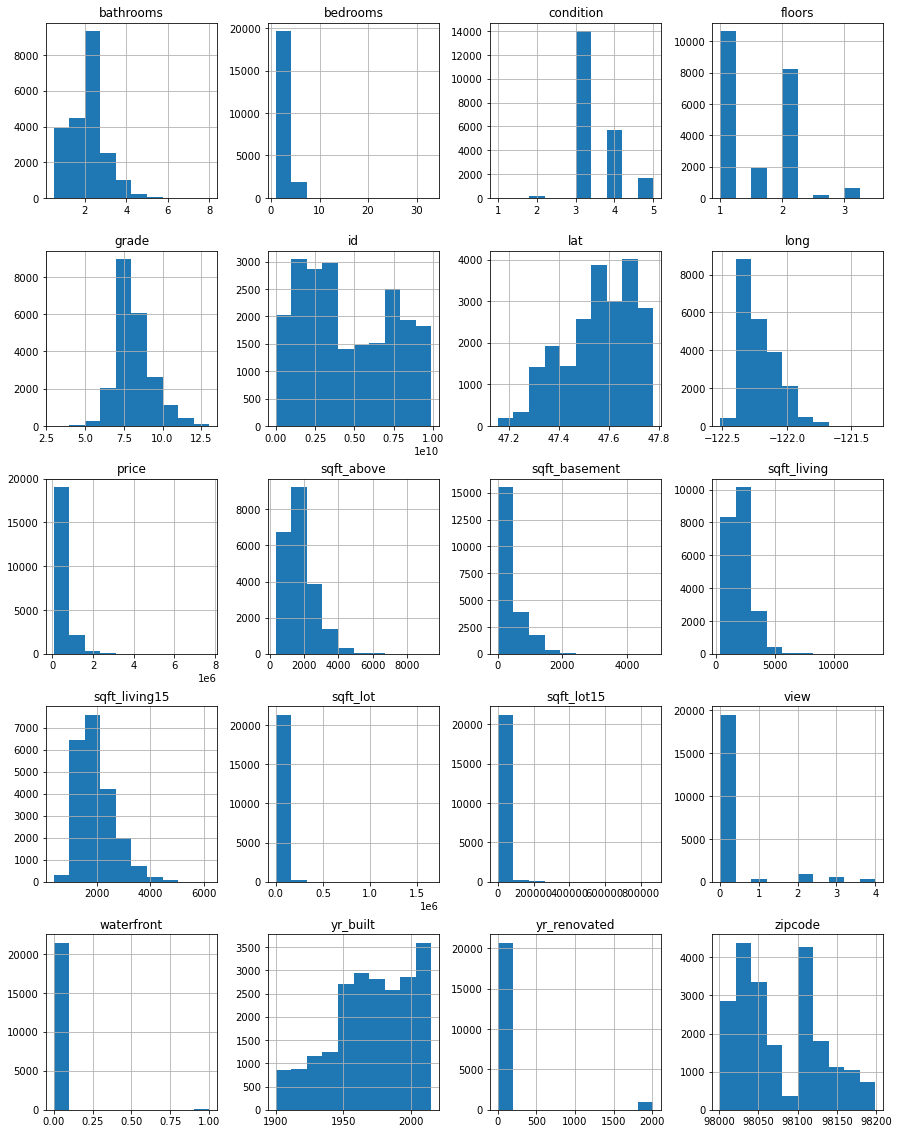

In [10]:
data.hist(figsize = (15,20))

Once we have check the distribution of our data, we observe if some of the main variables (for the moment) contain outliers contrasted with the price

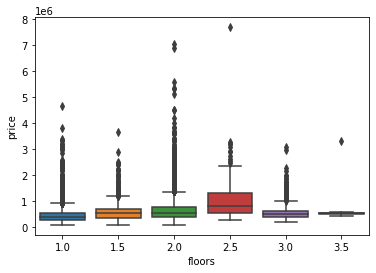

In [11]:
sns.boxplot(x="floors", y="price", data=data)

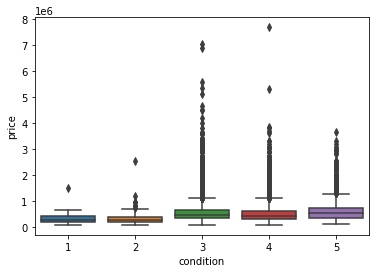

In [12]:
sns.boxplot(x="condition", y="price", data=data)

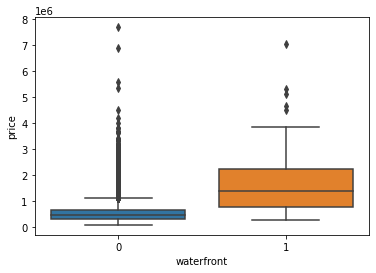

In [13]:
sns.boxplot(x="waterfront", y="price", data=data)


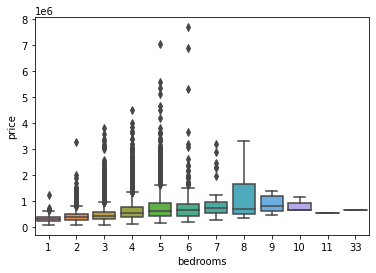

In [14]:
sns.boxplot(x="bedrooms", y="price", data=data)


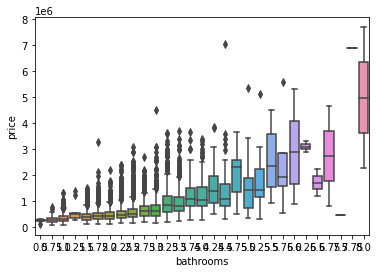

In [15]:
sns.boxplot(x="bathrooms", y="price", data=data)


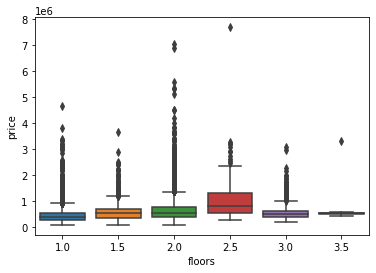

In [16]:
sns.boxplot(x="floors", y="price", data=data)

First observation: In some cases the type of the variables does not match with the reality, the data distribution is skewed, not normalized and it can contain outliers. Finally, there are no Null Values, but we will double-check.

# DATA CLEANING, WRANGLING AND PREPROCESSING

First step, check again that there is no null values, as it could affect negatively our models. As we see below there is no null values.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [18]:
data.isna().sum()
data.isnull().sum()
data.eq(' ').sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Proceed with standarizing the header

In [19]:
new_cols = [col.replace(" ", "_").lower() for col in data]
data.columns = new_cols

Check for duplicated values in id (It should be unique):

In [20]:
duplicateRowsDF = data[data.duplicated(['id'])]
duplicateRowsDF

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,12/23/14,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,3/11/15,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,12/29/14,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,3/24/15,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/15,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,12/1/14,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,3/30/15,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,5/4/15,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


We observe 177 id duplicates, they are updates of the price: We have 2 options:

1. Deleting the oldest repeated id, and drop sqft_living and sqft_lot columns. Problem of loosing information.
2. Creating a new column as a new id, and also drop sqft_living and sqft_lot columns

We choose the second option as it is a way to mantain more information:


In [21]:
# 1. Change the name from id to house id

data.rename(columns={'id':'house_id'})

    

,house_id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [22]:
# 2. Create a new column as an index, will be our PK

data['trans_id'] = range(0, 0+len(data))
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'trans_id'],
      dtype='object')

In [23]:
# We create a new variable and modificate the order of the columns

data_1 = data[['trans_id','id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]

As mentioned before, we change the type of the variables: Date to datetime, categoricals such as grade and boolean to Yes No variables 

In [24]:
data.astype({'date': 'datetime64', 'id': 'object', 'trans_id': 'object', 'grade': 'category', 'condition': 'category', 'waterfront' :'bool', 'view':'bool','sqft_basement':'bool','yr_renovated':'bool'}).dtypes


id                       object
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
view                       bool
condition              category
grade                  category
sqft_above                int64
sqft_basement              bool
yr_built                  int64
yr_renovated               bool
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
trans_id                 object
dtype: object

We drop the columns that we see that there will not add any value into the prediction model:

In [25]:
data_1.drop(['date','sqft_living', 'sqft_lot', 'lat', 'long'], axis=1, inplace=True)

In [26]:
# Check
data_1.columns

Index(['trans_id', 'id', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

Observe the correlation between variables:

In [27]:
data_1.corr()


,trans_id,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
trans_id,1.000000,0.006694,0.010030,0.107057,0.180026,-0.007636,-0.013499,-0.095654,0.082312,0.072252,-0.042036,0.199855,-0.025666,-0.002059,0.026691,-0.030311,0.027436
id,0.006694,1.000000,0.001150,0.005162,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.002701,-0.138557,-0.016772
bedrooms,0.010030,0.001150,1.000000,0.514508,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,0.393406,0.030690,0.308787
bathrooms,0.107057,0.005162,0.514508,1.000000,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.569884,0.088303,0.525906
floors,0.180026,0.018608,0.177944,0.502582,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.280102,-0.010722,0.256804
waterfront,-0.007636,-0.002727,-0.006834,0.063744,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,0.086507,0.030781,0.266398
view,-0.013499,0.011536,0.080008,0.188386,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.280681,0.072904,0.397370
condition,-0.095654,-0.023803,0.026496,-0.126479,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.093072,-0.003126,0.036056
grade,0.082312,0.008188,0.356563,0.665838,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.713867,0.120981,0.667951
sqft_above,0.072252,-0.010799,0.479386,0.686668,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,0.731767,0.195077,0.605368


For having a better visualization od the correlation between variables we plot a head map

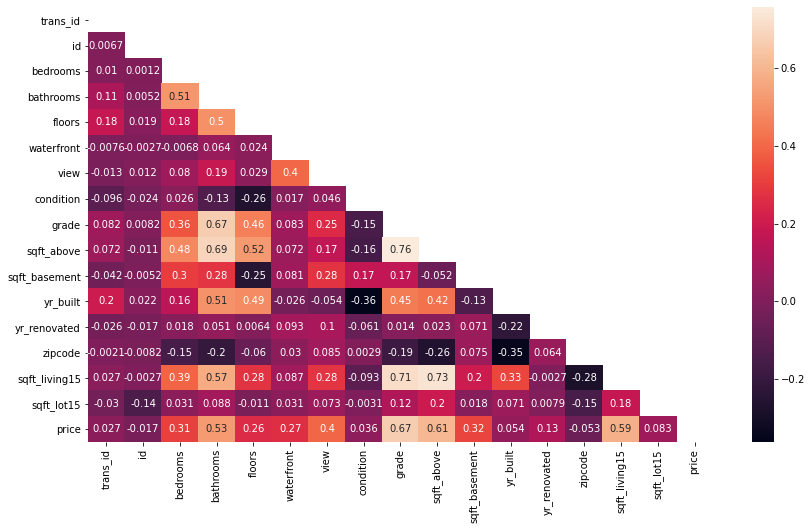

In [28]:
mask=np.zeros_like(data_1.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(14, 8))
ax=sns.heatmap(data_1.corr(), mask=mask, annot=True)
plt.show()

We check which variables have a good correlation with price, and also between eahc otjer, in order to drop redundan information

Good variables for price: Grade .67, sqft_above .61, sqft_living15 .59, bathrooms .53, viw .53

Correlated between them: Grade .45 with yr_build (To drop), sqft_above .76 (To drop) , sqft_living15 .71, bathrooms .67
                         
We will keep grade with view 
                           

In [29]:
# Define a new data set before drop 
data_test_1 = data_1

In [30]:
data_test_1.dtypes
# The dtypes has not been saved, we will solve it after dropping the columns

trans_id           int32
id                 int64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

As said previously, drop those variables with weak correlation with price (y) or with too much correlation with another:


In [31]:
data_test_1.drop(['id','trans_id','yr_built','sqft_above', 'sqft_living15', 'bathrooms','floors', 'condition', 'yr_renovated', 'zipcode', 'sqft_lot15'], axis=1, inplace=True)


In [32]:
# Check
data_test_1.columns

Index(['bedrooms', 'waterfront', 'view', 'grade', 'sqft_basement', 'price'], dtype='object')

In [33]:
# Observe
data_test_1.head()

,bedrooms,waterfront,view,grade,sqft_basement,price
0,3,0,0,7,0,221900
1,3,0,0,7,400,538000
2,2,0,0,6,0,180000
3,4,0,0,7,910,604000
4,3,0,0,8,0,510000


We change the types of the variables because it has not been saved previously:

In [34]:
data_test_1 = data_test_1.astype({'waterfront': 'bool', 'view':'bool', 'sqft_basement':'bool'}, copy = False)


In [35]:
data_test_1.dtypes

bedrooms         int64
waterfront        bool
view              bool
grade            int64
sqft_basement     bool
price            int64
dtype: object

- Bedrooms and price are numerical variables (Discete and continuos)
- Waterfront, view, grade, sqft_basement: Categorical

# VISUALIZATION OF THE NEW DATA

Plot in a histogram Numerical Discrete Variables

(array([2.9560e+03, 1.6706e+04, 1.6010e+03, 3.1000e+02, 1.3000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. ]),
 <a list of 20 Patch objects>)

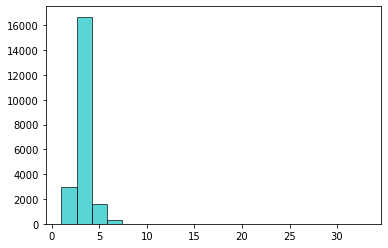

In [36]:
plt.hist(data_test_1['bedrooms'], bins=20, color='c', edgecolor='k', alpha=0.65)


Plot in distribution plot Numerical Continous

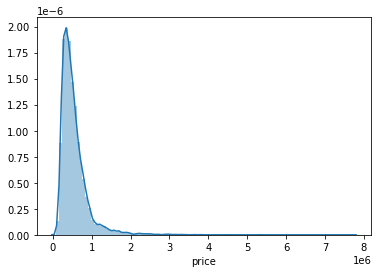

In [37]:
sns.distplot(data_test_1["price"], bins = 100);

Bar plot Categorical

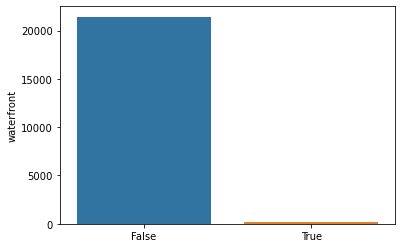

In [38]:
sns.barplot(x = data_test_1['waterfront'].value_counts().index,
                y = data_test_1['waterfront'].value_counts())

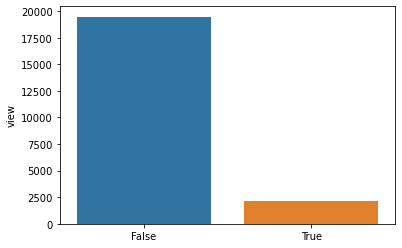

In [39]:
sns.barplot(x = data_test_1['view'].value_counts().index,
                y = data_test_1['view'].value_counts())

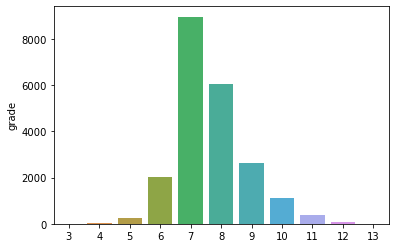

In [40]:
sns.barplot(x = data_test_1['grade'].value_counts().index,
                y = data_test_1['grade'].value_counts())

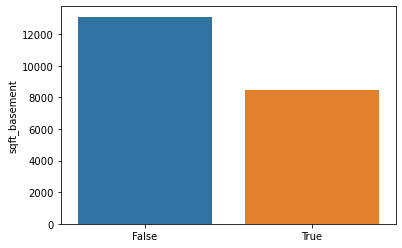

In [41]:
sns.barplot(x = data_test_1['sqft_basement'].value_counts().index,
                y = data_test_1['sqft_basement'].value_counts())

# CLEANING AND WRANGLING THE NEW DATA

TRANSFORM CATEGORICAL (BOOLEANS)

From the visualization, we observe that some of the boolean data is imbalanced. We will deal with it latter. But first, we need to transform it to a numeric variable

We create the following function:

In [42]:
def go_binary(x):
    if x == 0:  
        return 0
    else:
        return 1

We apply the function to our boolean data:

In [43]:
data_test_1['waterfront'] = data_test_1['waterfront'].apply(go_binary)

In [44]:
data_test_1['view'] = data_test_1['view'].apply(go_binary)

In [45]:
data_test_1['sqft_basement'] = data_test_1['sqft_basement'].apply(go_binary)

DROP OUTLIERS

As mentioned before, we observed that the data contained outliers values, we will deal with them by dropping:

1. Define a function that drop outliers which are not in our threshold

In [46]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [47]:
data_test_1.columns

Index(['bedrooms', 'waterfront', 'view', 'grade', 'sqft_basement', 'price'], dtype='object')

2. We apply the function to numerical values

In [48]:
bedrooms_outliers = outliers(data_test_1["bedrooms"])
grade_outliers = outliers(data_test_1['grade'])

In [49]:
to_drop = bedrooms_outliers.index | grade_outliers.index # Union

In [50]:
clean_data_test_1 = data_test_1.drop(to_drop).reset_index(drop = True)
clean_data_test_1

,bedrooms,waterfront,view,grade,sqft_basement,price
0,3,0,0,7,0,221900
1,3,0,0,7,1,538000
2,2,0,0,6,0,180000
3,4,0,0,7,1,604000
4,3,0,0,8,0,510000
...,...,...,...,...,...,...
21402,3,0,0,8,0,360000
21403,4,0,0,8,0,400000
21404,2,0,0,7,0,402101
21405,3,0,0,8,0,400000


# PREPROCESSING THE DATA

Define the variables:

In [80]:
X = clean_data_test_1[['bedrooms', 'waterfront','view', 'grade', 'sqft_basement']] # Define the independent variables
y = clean_data_test_1[['price']]

Encoding categorical data before normalizing it with 'One hot encoder'

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
scaled_x = np.array(ct.fit_transform(X))

Normalization of the data

In [81]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X) # you define a variable with the X, but normalized
scaled_x = transformer.transform(X) # you transform the variables

Dealing with imbalanced categorical data:

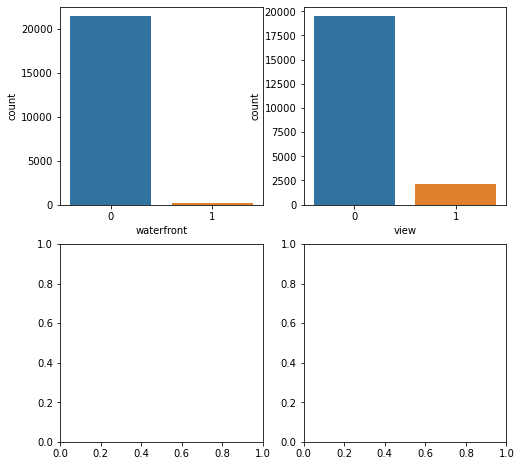

In [54]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)
sns.countplot(data_test_1["waterfront"], ax=axes[0,0])
sns.countplot(data_test_1["view"], ax=axes[0,1])

# Previously, we have seen that we have 2 of our variables imbalanced, see graphs below:

Dealing with the SMOTE technique: It gave us error, see the code

As we could not apply the SMOTE technique for dealing with imbalanced data, we apply random oversampling:

In [82]:
from imblearn.over_sampling import RandomOverSampler

X_ros, y_ros = RandomOverSampler().fit_sample(scaled_x, y)

# APPLYING THE MODEL: MULTIPLE LINEAR REGRESSION

We will use the scaled data:

In [84]:
print(scaled_x)
# Dealed with it in the previous step

[[-0.41078741 -0.08456511 -0.32578124 -0.5682626  -0.80283358]
 [-0.41078741 -0.08456511 -0.32578124 -0.5682626   1.24558816]
 [-1.55879343 -0.08456511 -0.32578124 -1.45588007 -0.80283358]
 ...
 [-1.55879343 -0.08456511 -0.32578124 -0.5682626  -0.80283358]
 [-0.41078741 -0.08456511 -0.32578124  0.31935487 -0.80283358]
 [-1.55879343 -0.08456511 -0.32578124 -0.5682626  -0.80283358]]


Splitting the dataset into the Training set and Test set (20% test, 80% train):

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 0)

In [87]:
# Check
X_train

array([[-0.41078741, -0.08456511, -0.32578124,  2.09458982,  1.24558816],
       [-0.41078741, -0.08456511, -0.32578124, -0.5682626 , -0.80283358],
       [ 0.73721861, -0.08456511, -0.32578124,  0.31935487, -0.80283358],
       ...,
       [-1.55879343, -0.08456511,  3.06954446, -0.5682626 ,  1.24558816],
       [ 0.73721861, -0.08456511, -0.32578124, -0.5682626 ,  1.24558816],
       [-0.41078741, -0.08456511, -0.32578124, -0.5682626 , -0.80283358]])

Import the model and fit it with our train data:

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [88]:
#Check
X_test

array([[ 0.73721861, -0.08456511,  3.06954446, -0.5682626 ,  1.24558816],
       [-0.41078741, -0.08456511, -0.32578124, -0.5682626 ,  1.24558816],
       [-0.41078741, -0.08456511, -0.32578124,  0.31935487, -0.80283358],
       ...,
       [-0.41078741, -0.08456511, -0.32578124, -0.5682626 , -0.80283358],
       [-1.55879343, -0.08456511, -0.32578124, -1.45588007, -0.80283358],
       [-0.41078741, -0.08456511, -0.32578124,  1.20697235, -0.80283358]])

# EVALUATING THE MODEL:

In [61]:
lin_test_pred = regressor.predict(X_test)

In [62]:
reg = LinearRegression().fit(X_train, y_train)

In [63]:
Accuracy = round(reg.score(X_test, y_test)*100,2)
Accuracy

51.71

Our model has an accuracy of 51.71%, but let's analyze more in deep with ohter metrics:

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 156023.39762553692
Mean Squared Error: 48440533944.217766
Root Mean Squared Error: 220092.1033209001


In [67]:
data['price'].mean()

540296.5735055795

CONCLUSION: We can see that the value of "root mean squared error" is 220.092,1. This is a 40% of the mean value of the percentages of all the prices (540.296,57). Our Algorithm need to improve.

In [68]:
reg.coef_

array([[ 24702.9834417 ,  58815.61404518,  52724.32062464,
        192975.41734877,  37367.6087015 ]])

In [69]:
reg.intercept_


array([532153.34250164])

The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning.

# APPLYING THE MODEL: OLS MODEL

Import the library and fit the model

In [91]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) 

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3790.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:15:00   Log-Likelihood:            -2.3585e+05
No. Observations:               17125   AIC:                         4.717e+05
Df Residuals:                   17119   BIC:                         4.718e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.322e+05   1770.836    300.510      0.0

Analysis of the OLS Report:

- Adj. R-squared: 0.525 - Accuracy of 52.5 % 
- P>|t|: 0.000 All of the variables contribute to the explanatory power of the model
- Prob(Omnibus): The residuals - meaning the diffences between each true y-value and the corresponding predicted y-value - should be normaly distributed if your data fulfill the OLS assumptions. If not, Prob(Omnibus) can be really low and it can be the case that you're missing important steps in your preprocessing, or the model you chose is not a suitable one for the data. 
- Coefficients: An increase in one unit of X4 (Grade) results in an increase of 193.000 of the target variable price - keeping all other variables constant"



Prob(Omnibus): In your case you have 0.000. Try to create a histogram of your residuals (y_prediced - y_test) and check for normality to make sure.

# APPLYING THE MODEL: MULTIPLE POLYNOMIAL REGRESSION

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(scaled_x,y)

poly_x_train, poly_x_test, poly_y_train, poly_y_test = train_test_split(scaled_x, y, test_size = 0.3, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_x_train, poly_y_train)
score = model.score(poly_x_test, poly_y_test)

Run out time

# QUESTION 2

Understanding which factors are responsible for higher property value - $650K and above. 

In [75]:
# Extract only prices = or > than 650.000 and do a head map to know the most correlated factors

data_2 = data[data.price >= 650000]

In [76]:
data_2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,trans_id
5,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000,5
10,1736800520,4/3/15,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500,10
15,9297300055,1/24/15,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,650000,15
21,2524049179,8/26/14,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000,21
26,1794500383,6/26/14,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000,26


In [77]:
data_2.shape

(5322, 22)

In [78]:
data.shape

(21597, 22)

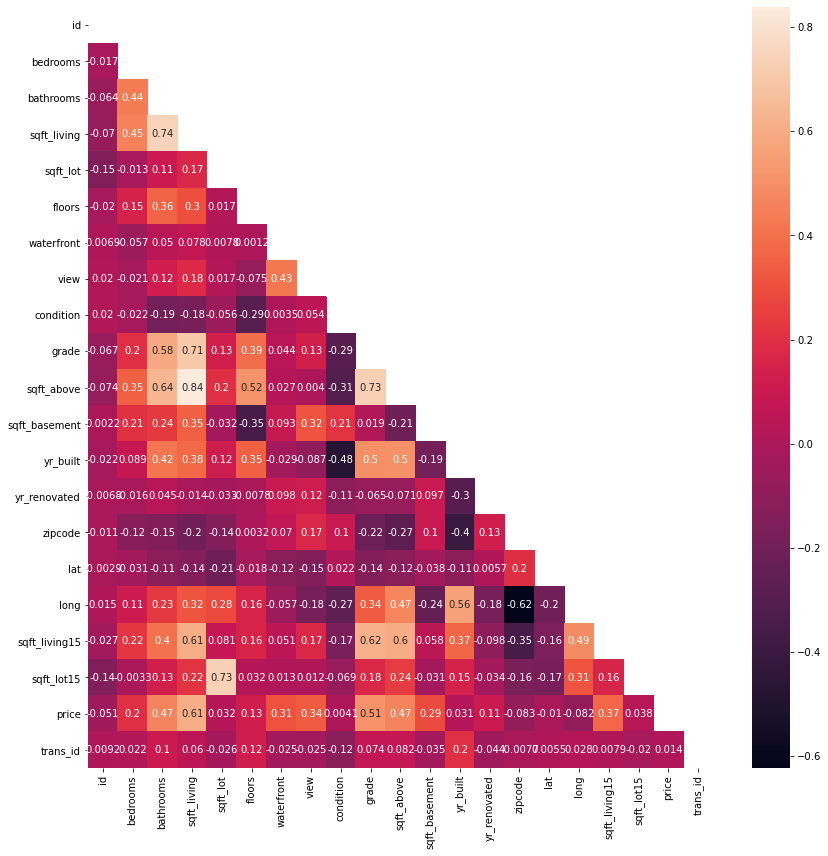

In [79]:
mask=np.zeros_like(data_2.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(14, 14))
ax=sns.heatmap(data_2.corr(), mask=mask, annot=True)
plt.show()

# The following are main factors for determining the price: 47% bathrooms, 61% sqft:living, 51% grade, 47% sqft_above